In [10]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from vicon.dereplication.derep import run_vsearch
from vicon.alignment.ref_align import run_viralmsa


from vicon.processing.sample_processing import process_all_samples
from vicon.visualization.plots import plot_non_gap_counts
from vicon.processing.coverage_analysis import abundant_kmers, crop_df, build_coverage_table, top_kmers_df
from vicon.io.fasta import read_fasta_to_dataframe
from vicon.processing.sample_processing import pipeline_results_cleaner
from vicon.utils.helpers import count_non_gap_characters_from_dataframe
from vicon.visualization.plots import plot_rel_cons

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [21]:
fastx_uniques= "../data/rsva/samples/RSVA_1973-2023-10.fasta"
fastaout= "../data/rsva/samples/derep.fasta"
uc= "../data/rsva/samples/clusters.uc"

In [22]:
e= "email@address.com"
s= "../data/rsva/samples/derep.fasta"
o= "../data/rsva/samples/aligned"
r= "../data/rsva/reference/EPI_ISL_412866_RSVA_ref.fasta"

In [23]:
run_vsearch(fastx_uniques, fastaout, uc)

CompletedProcess(args=['vsearch', '--fastx_uniques', '../data/rsva/samples/RSVA_1973-2023-10.fasta', '--fastaout', '../data/rsva/samples/derep.fasta', '--uc', '../data/rsva/samples/clusters.uc', '--sizeout'], returncode=0, stdout='', stderr='vsearch v2.29.0_linux_x86_64, 1509.9GB RAM, 80 cores\nhttps://github.com/torognes/vsearch\n\nDereplicating file ../data/rsva/samples/RSVA_1973-2023-10.fasta 100%\n66813743 nt in 4407 seqs, min 14900, max 15526, avg 15161\nSorting 100%\n4082 unique sequences, avg cluster 1.1, median 1, max 12\nWriting FASTA output file 100%\nWriting uc file, first part 100%\nWriting uc file, second part 100%\n')

In [27]:
run_viralmsa(s, o, r, script_path = "../scripts/ViralMSA.py")

CompletedProcess(args=['python', '../scripts/ViralMSA.py', '-e', 'email@address.com', '-s', '../data/rsva/samples/derep.fasta', '-o', '../data/rsva/samples/aligned', '-r', '../data/rsva/reference/EPI_ISL_412866_RSVA_ref.fasta'], returncode=0, stdout='', stderr='[2024-12-02 14:49:51] ===== RUN INFORMATION =====\n[2024-12-02 14:49:51] ViralMSA Version: 1.1.44\n[2024-12-02 14:49:51] Sequences: /fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/derep.fasta\n[2024-12-02 14:49:51] - 4082 sequences in input file\n[2024-12-02 14:49:51] Reference: EPI_ISL_412866_RSVA_ref.fasta_HASH_a67a53fb8d768f707ed3c6e958a56ccd\n[2024-12-02 14:49:51] Email Address: email@address.com\n[2024-12-02 14:49:51] Output Directory: /fast/AG_Ohler/ekarimi/projects/vicon/data/rsva/samples/aligned\n[2024-12-02 14:49:51] Aligner: minimap2\n[2024-12-02 14:49:51] ViralMSA Cache Directory: /home/ekarimi/.viralmsa\n[2024-12-02 14:49:51] \n[2024-12-02 14:49:51] ===== REFERENCE GENOME =====\n[2024-12-02 14:49:51] Referenc

In [31]:
from vicon.io.fasta import create_folders_and_save_sequences


fasta_file = "../data/rsva/samples/aligned/derep.fasta.aln"
new_address = "../data/rsva/samples/separated"
create_folders_and_save_sequences(fasta_file, new_address)

In [32]:

# Constants
FOLDER_PATH = '../data/rsva/samples/separated/'
SUB_FOLDER = '/a/output_files/'
SAMPLE_NAME = 'derep'
KMER_SIZE = 150
L_GENE_START = 8000
L_GENE_END = 16000
COVERAGE_RATIO = 0.5
REF_FILE = 'EPI_ISL_412866_RSVA_ref.fasta'
REF_ADDRESS = os.path.join('../data/rsva/reference', REF_FILE)

SAMPLE_ADDRESS = '../data/rsva/samples/aligned/derep.fasta.aln'
VARIANT = 'a'




In [33]:

reference_path = "../data/rsva/reference/EPI_ISL_412866_RSVA_ref.fasta"
samples_dir = "../data/rsva/samples/separated/"


output_dir = "output/binary_results/"

# Process all samples and aggregate results
df = process_all_samples(reference_path, samples_dir, output_dir, window_size=150, threshold=149)

# Save aggregated results
df.to_csv("output/aggregated_results.csv")
print("Aggregated results saved.")

# df = pd.read_csv("output/aggregated_results.csv", index_col="SampleID")
df

Processed EPI_ISL_412866, results saved to output/binary_results/EPI_ISL_412866_binary.npy
Processed hRSV_A_Argentina_159_2004, results saved to output/binary_results/hRSV_A_Argentina_159_2004_binary.npy
Processed hRSV_A_Argentina_170_2005, results saved to output/binary_results/hRSV_A_Argentina_170_2005_binary.npy
Processed hRSV_A_Argentina_177_2006, results saved to output/binary_results/hRSV_A_Argentina_177_2006_binary.npy
Processed hRSV_A_Argentina_ARG-001_2015, results saved to output/binary_results/hRSV_A_Argentina_ARG-001_2015_binary.npy
Processed hRSV_A_Argentina_ARG-001sanger_2015, results saved to output/binary_results/hRSV_A_Argentina_ARG-001sanger_2015_binary.npy
Processed hRSV_A_Argentina_ARG-003_2015, results saved to output/binary_results/hRSV_A_Argentina_ARG-003_2015_binary.npy
Processed hRSV_A_Argentina_ARG-007_2016, results saved to output/binary_results/hRSV_A_Argentina_ARG-007_2016_binary.npy
Processed hRSV_A_Argentina_ARG-009_2016, results saved to output/binary_re

,0,1,2,3,4,5,6,7,8,9,...,15066,15067,15068,15069,15070,15071,15072,15073,15074,15075
SampleID,,,,,,,,,,,,,,,,,,,,,
EPI_ISL_412866,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
hRSV_A_Argentina_159_2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV_A_Argentina_170_2005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV_A_Argentina_177_2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV_A_Argentina_ARG-001_2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hRSV_a_Slovakia_1342_2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV_a_Slovakia_1532_2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hRSV_a_Slovakia_1533_2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


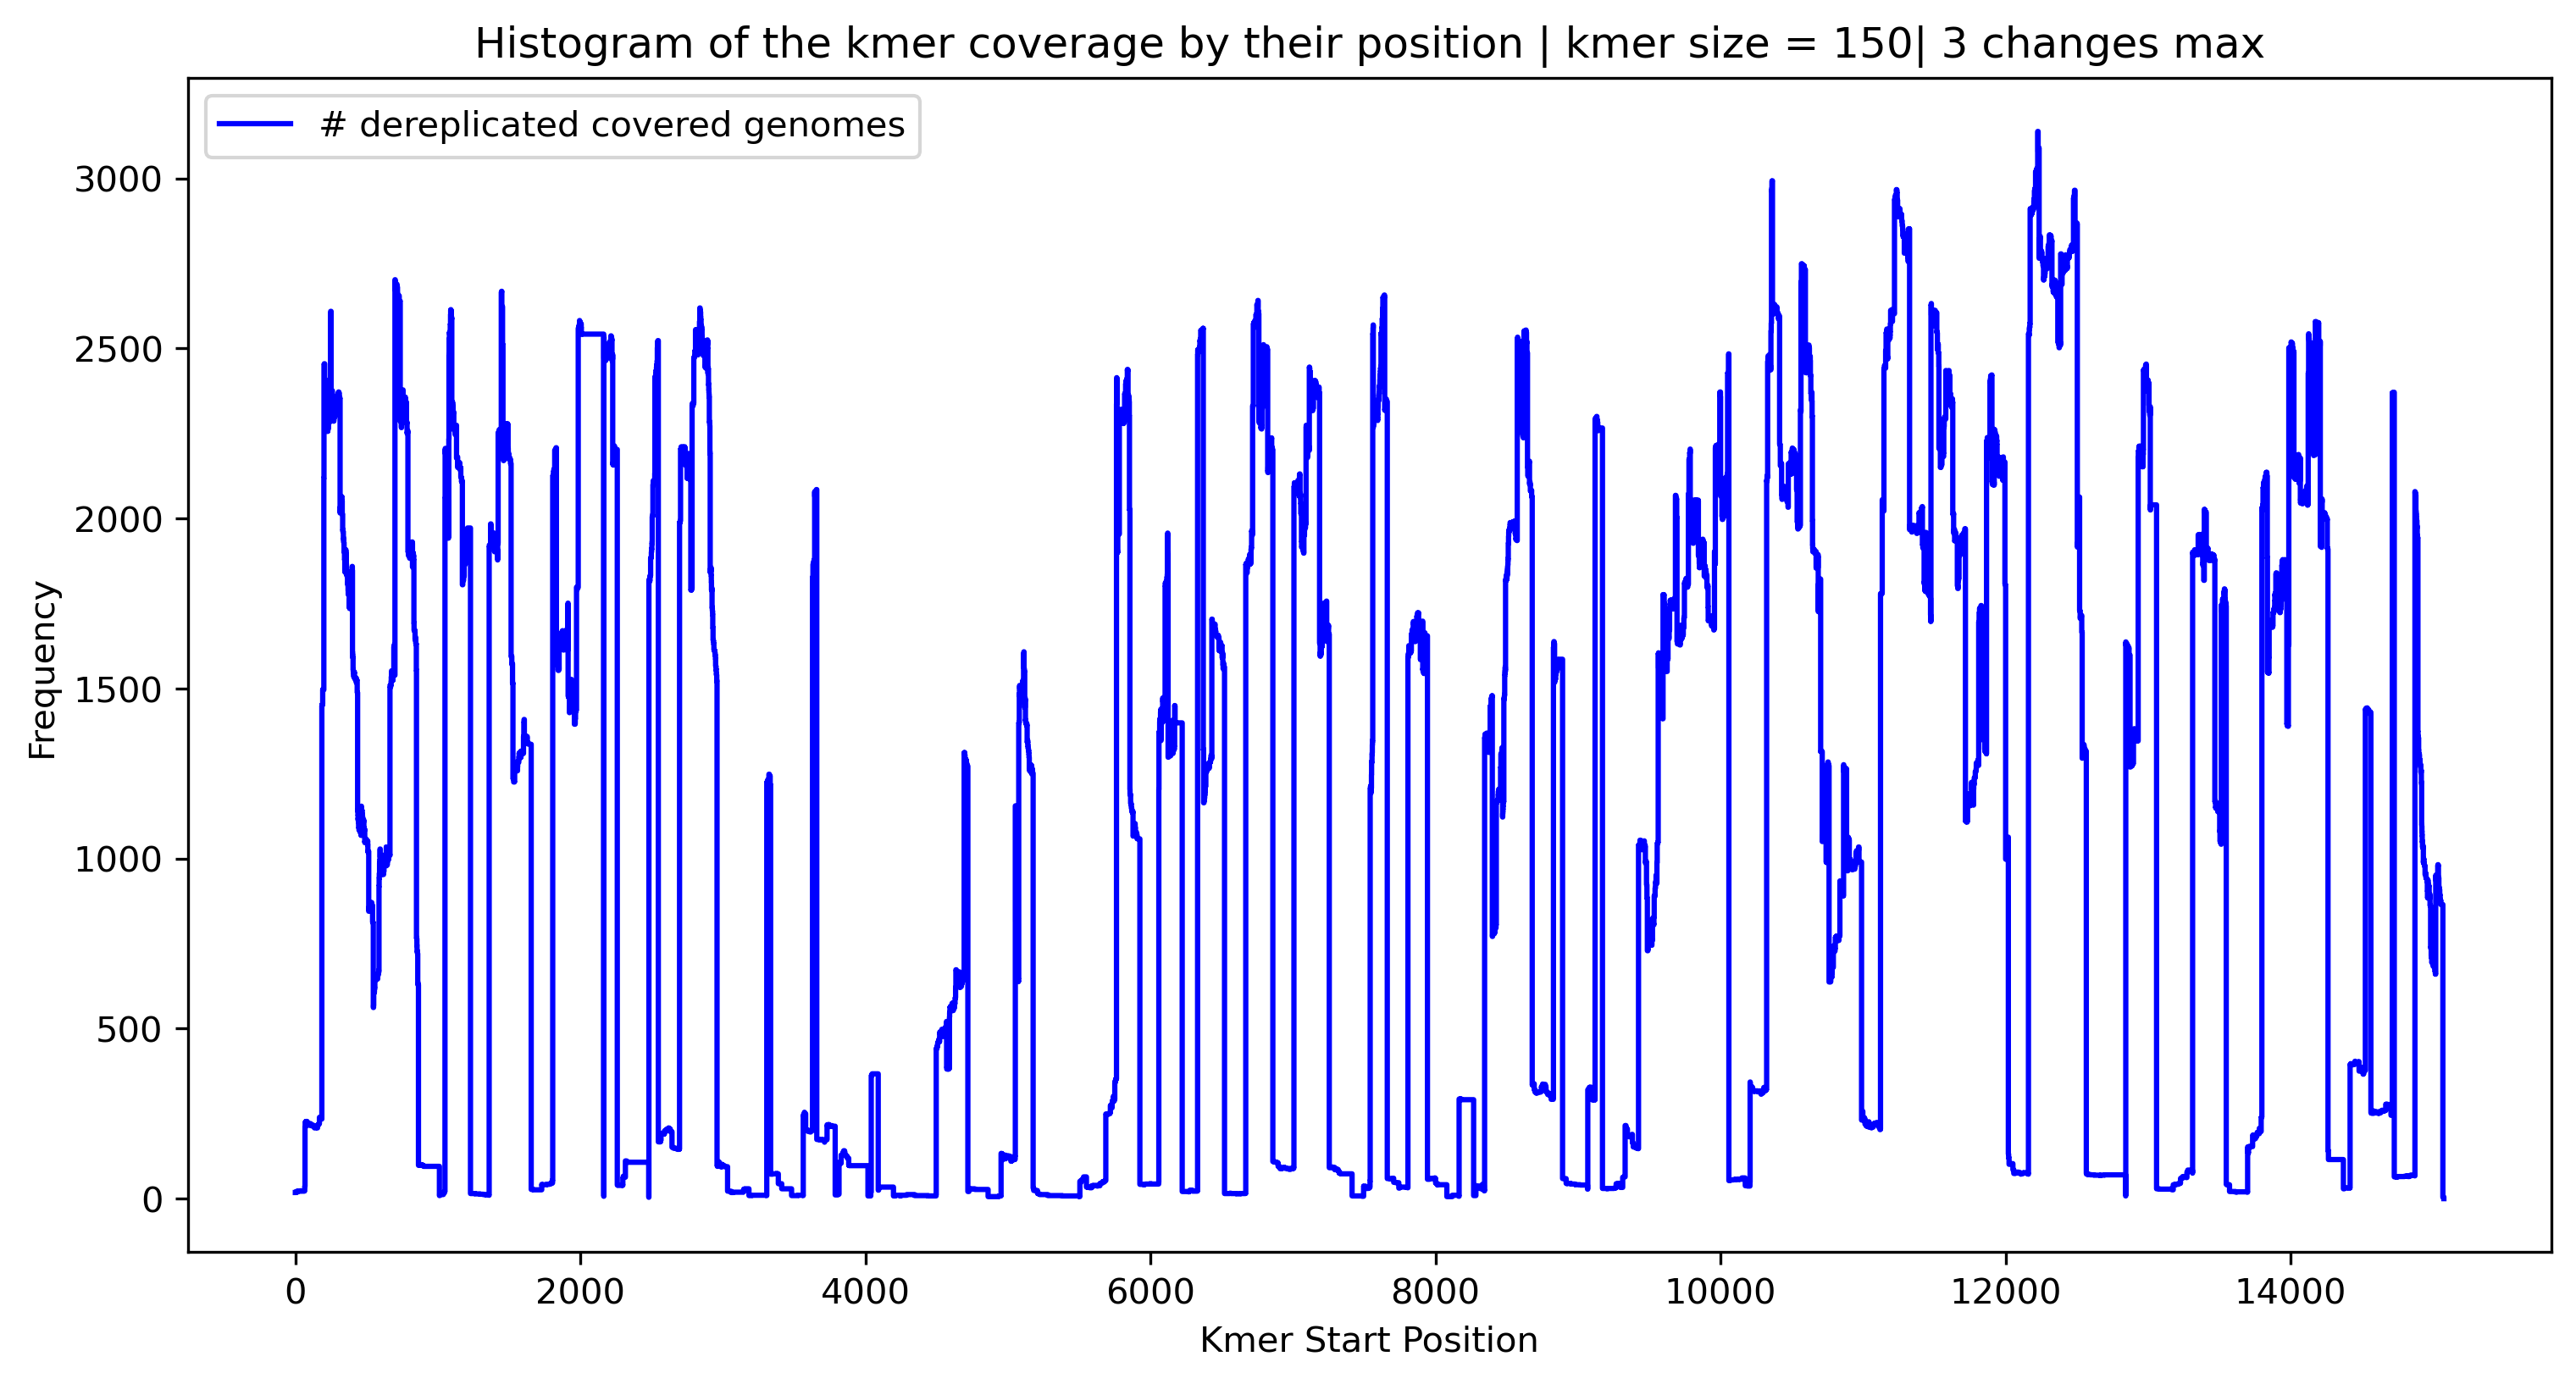

In [34]:
df.columns = df.columns.astype(int)
plot_rel_cons(df)

In [35]:


    # Find abundant kmers
sorted_kmers, samples = abundant_kmers(df)

# Crop DataFrame to L gene region and apply coverage threshold
ldf = crop_df(df, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)

# Build coverage table
cov_df = build_coverage_table(ldf)



Finding abundant kmers...
Kmer start pos: 12224 has appeared in 3138 samples / 4081 samples
Remaining kmers to process: 1979766
Kmer start pos: 11897 has appeared in 547 samples / 943 samples
Remaining kmers to process: 971326
Kmer start pos: 2837 has appeared in 230 samples / 396 samples
Remaining kmers to process: 191581
Kmer start pos: 11441 has appeared in 75 samples / 166 samples
Remaining kmers to process: 66433
Kmer start pos: 1449 has appeared in 38 samples / 91 samples
Remaining kmers to process: 14923
Kmer start pos: 8621 has appeared in 17 samples / 53 samples
Remaining kmers to process: 5163
Kmer start pos: 14208 has appeared in 6 samples / 36 samples
Remaining kmers to process: 4308
Kmer start pos: 1458 has appeared in 5 samples / 30 samples
Remaining kmers to process: 262
Kmer start pos: 712 has appeared in 1 samples / 25 samples
Remaining kmers to process: 170
Kmer start pos: 1488 has appeared in 1 samples / 24 samples
Remaining kmers to process: 95
Kmer start pos: 2806 

In [10]:
# Find top kmers
sub_df = top_kmers_df(cov_df)

set1 = np.unique(sub_df['k1'].values)
print(f"Set1 kmers: {set1}")

set2 = np.unique(sub_df['k2'].values)
print(f"Set2 kmers: {set2}")

kmer1, kmer2 = int(set1[0]), int(set2[0])
print(f"Selected kmers: {kmer1}, {kmer2}")

# Find remaining samples not covered by top kmers
print("Finding remaining samples not covered by top kmers...")
remaining_samples = df.loc[(df[kmer1] + df[kmer2]) == 0]
remaining_samples_ids = list(remaining_samples.index)
print(f"Number of remaining samples: {len(remaining_samples_ids)}")

df_ref = read_fasta_to_dataframe(REF_ADDRESS)
ref_seq = df_ref['Sequence'].values[0]

# Extract kmer sequences
kmer1_seq = ref_seq[kmer1:kmer1+KMER_SIZE]
kmer2_seq = ref_seq[kmer2:kmer2+KMER_SIZE]

print(f"Kmer1 sequence (position {kmer1}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {kmer2}):\n{kmer2_seq}")



# Run the pipeline
df_kmers1_drop_old, df_kmers2_drop_old = pipeline_results_cleaner(sample_address=SAMPLE_ADDRESS,
                                                                kmer1=kmer1, kmer2=kmer2, drop_old_samples=True,
                                                                kmer_size= 150, min_year=2020, threshold_ratio=0.01)
# df_kmers1_drop_old.to_excel(f"../results/{VARIANT}_kmer1_drop_old.xlsx")
# df_kmers2_drop_old.to_excel(f"../results/{VARIANT}_kmer2_drop_old.xlsx")

df_kmers1, df_kmers2 = pipeline_results_cleaner(sample_address=SAMPLE_ADDRESS,
                            kmer1=kmer1, kmer2=kmer2, drop_old_samples=False,
                            kmer_size= 150, min_year=2020, threshold_ratio=0.01)
# df_kmers1.to_excel(f"../results/{VARIANT}_kmer1.xlsx")
# df_kmers2.to_excel(f"../results/{VARIANT}_kmer2.xlsx")

df_kmers1.to_csv(f"../results/{VARIANT}_kmer1.csv")
df_kmers2.to_csv(f"../results/{VARIANT}_kmer2.csv")


df_counts = count_non_gap_characters_from_dataframe(df_kmers1_drop_old, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VARIANT}**kmers1_drop_old -- Non-Gap Character Counts at Each Position')

df_counts = count_non_gap_characters_from_dataframe(df_kmers2_drop_old, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VARIANT}**kmers2_drop_old -- Non-Gap Character Counts at Each Position')

df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VARIANT}**kmers1 -- Non-Gap Character Counts at Each Position')

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VARIANT}**kmers2 -- Non-Gap Character Counts at Each Position')


Top kmers found covering 3685 samples with total coverage 5559
Set1 kmers: [11900 11901 11902]
Set2 kmers: [12224 12225 12226]
Selected kmers: 11900, 12224
Finding remaining samples not covered by top kmers...
Number of remaining samples: 396
Kmer1 sequence (position 11900):
GTTGTTTATGAAAGTTTACCCTTTTATAAAGCAGAGAAAATAGTAAATCTTATATCCGGTACAAAATCTATAACTAACATACTGGAAAAGACTTCTGCCATAGACTTAACAGATATTGATAGAGCCACTGAGATGATGAGGAAAAACATA
Kmer2 sequence (position 12224):
TATACAACAAGCACTATAGCTAGTGGCATAATCATAGAGAAATATAATGTCAACAGTTTAACACGTGGTGAGAGAGGACCCACTAAACCATGGGTTGGTTCATCTACACAAGAGAAAAAGACAATGCCAGTTTATAATAGACAAGTTTTA
Plot saved as a**kmers1_drop_old_--_Non-Gap_Character_Counts_at_Each_Position.png
Plot saved as a**kmers2_drop_old_--_Non-Gap_Character_Counts_at_Each_Position.png
Plot saved as a**kmers1_--_Non-Gap_Character_Counts_at_Each_Position.png
Plot saved as a**kmers2_--_Non-Gap_Character_Counts_at_Each_Position.png
